# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'
units= 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | umba
Processing Record 4 of Set 1 | gaalkacyo
Processing Record 5 of Set 1 | malango
Processing Record 6 of Set 1 | aldan
Processing Record 7 of Set 1 | mount isa
Processing Record 8 of Set 1 | norilsk
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | coquimbo
Processing Record 11 of Set 1 | aral
Processing Record 12 of Set 1 | beteza
City not found. Skipping...
Processing Record 13 of Set 1 | korla
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | keflavik
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | wailua homesteads
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | marsh harbour


Processing Record 40 of Set 4 | zhezqazghan
Processing Record 41 of Set 4 | susuman
Processing Record 42 of Set 4 | galesong
Processing Record 43 of Set 4 | ashland
Processing Record 44 of Set 4 | san severino marche
Processing Record 45 of Set 4 | san matias
Processing Record 46 of Set 4 | amungan
Processing Record 47 of Set 4 | hihifo
City not found. Skipping...
Processing Record 48 of Set 4 | mahina
Processing Record 49 of Set 4 | smara
Processing Record 0 of Set 5 | arkhangel'sk
Processing Record 1 of Set 5 | namibe
Processing Record 2 of Set 5 | qarqaraly
Processing Record 3 of Set 5 | magadan
Processing Record 4 of Set 5 | boguchany
Processing Record 5 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 6 of Set 5 | carutapera
Processing Record 7 of Set 5 | san patricio
Processing Record 8 of Set 5 | cascais
Processing Record 9 of Set 5 | kaiapoi
Processing Record 10 of Set 5 | huanggang
Processing Record 11 of Set 5 | klyuchi
Processing Record 12 of Set 5 | ponte

Processing Record 32 of Set 8 | egilsstadir
Processing Record 33 of Set 8 | tangalle
Processing Record 34 of Set 8 | santo antonio
Processing Record 35 of Set 8 | toba tek singh
Processing Record 36 of Set 8 | diawara
Processing Record 37 of Set 8 | ghat
Processing Record 38 of Set 8 | queenstown
Processing Record 39 of Set 8 | los llanos de aridane
Processing Record 40 of Set 8 | ilam
Processing Record 41 of Set 8 | zhenlai
Processing Record 42 of Set 8 | bumba
Processing Record 43 of Set 8 | nukunonu
City not found. Skipping...
Processing Record 44 of Set 8 | chicxulub puerto
City not found. Skipping...
Processing Record 45 of Set 8 | kailua-kona
Processing Record 46 of Set 8 | racine
Processing Record 47 of Set 8 | sougueur
Processing Record 48 of Set 8 | broken hill
Processing Record 49 of Set 8 | paoua
Processing Record 0 of Set 9 | herrieden
Processing Record 1 of Set 9 | kerikeri
Processing Record 2 of Set 9 | hammerfest
Processing Record 3 of Set 9 | pacific grove
Processing Re

Processing Record 16 of Set 12 | ola
Processing Record 17 of Set 12 | yuzhno-kurilsk
Processing Record 18 of Set 12 | upata
Processing Record 19 of Set 12 | jalal-abad
Processing Record 20 of Set 12 | zhengjiatun
Processing Record 21 of Set 12 | hailar
Processing Record 22 of Set 12 | areka
Processing Record 23 of Set 12 | chiredzi
Processing Record 24 of Set 12 | linkoping
Processing Record 25 of Set 12 | ilha de mocambique
Processing Record 26 of Set 12 | tafuna
Processing Record 27 of Set 12 | galle
Processing Record 28 of Set 12 | praia da vitoria
Processing Record 29 of Set 12 | mar del plata
Processing Record 30 of Set 12 | tumpat
Processing Record 31 of Set 12 | alo
Processing Record 32 of Set 12 | kijang
Processing Record 33 of Set 12 | muynoq
Processing Record 34 of Set 12 | trairi
Processing Record 35 of Set 12 | kitimat
Processing Record 36 of Set 12 | balabac
Processing Record 37 of Set 12 | pindushi
Processing Record 38 of Set 12 | la'ie
Processing Record 39 of Set 12 | pr

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,2.12,96,99,2.60,GS,1699580105
1,puerto natales,-51.7236,-72.4875,9.25,49,40,6.17,CL,1699580110
2,umba,66.6871,34.3429,-4.17,91,92,1.74,RU,1699580676
3,gaalkacyo,6.7697,47.4308,24.19,74,98,5.29,SO,1699580676
4,malango,-2.9627,119.9001,28.48,54,19,1.76,ID,1699580677


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.12,96,99,2.60,GS,1699580105
1,puerto natales,-51.7236,-72.4875,9.25,49,40,6.17,CL,1699580110
2,umba,66.6871,34.3429,-4.17,91,92,1.74,RU,1699580676
3,gaalkacyo,6.7697,47.4308,24.19,74,98,5.29,SO,1699580676
4,malango,-2.9627,119.9001,28.48,54,19,1.76,ID,1699580677


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

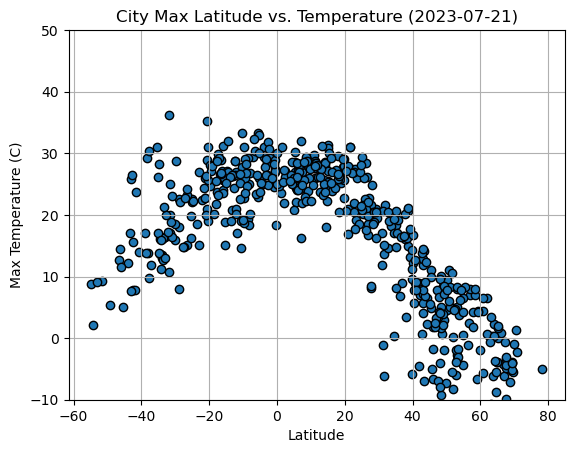

In [10]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
fig, ax = plt.subplots()
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-07-21)")
plt.grid(True)
plt.ylim(-10, 50)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

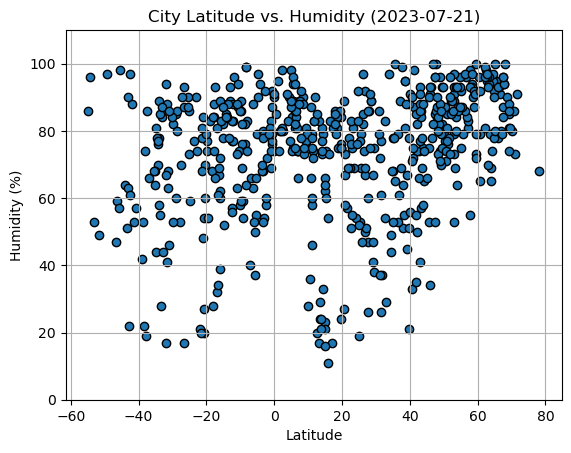

In [11]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
fig, ax = plt.subplots()
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-07-21)")
plt.grid(True)
plt.ylim(0, 110)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

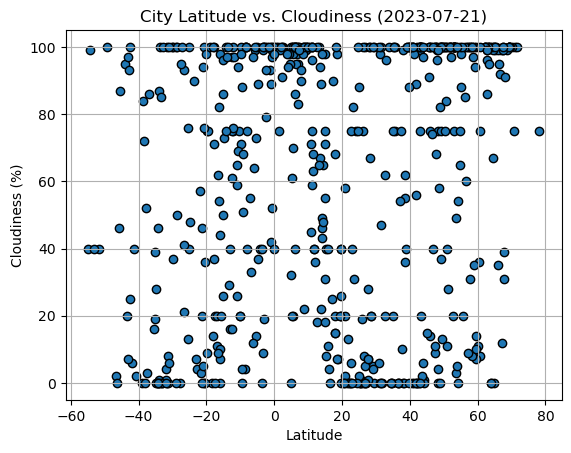

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
fig, ax = plt.subplots()
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-07-21)")
plt.grid(True)
plt.ylim(-5, 105)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

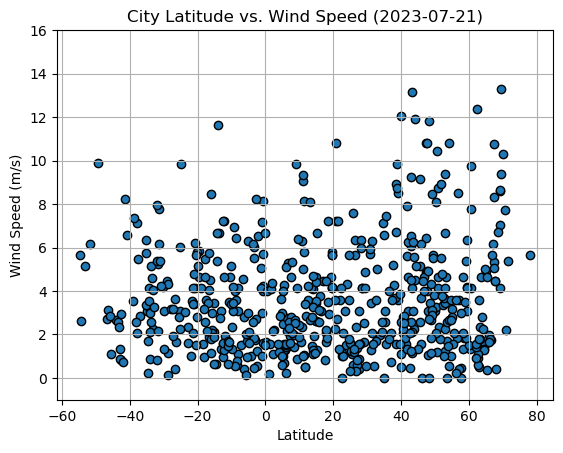

In [13]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
fig, ax = plt.subplots()
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-07-21)")
plt.grid(True)
plt.ylim(-1, 16)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def regression_plot(df, x_col, y_col, line_eq_pos=None):
    x_values = df[x_col].values
    y_values = df[y_col].values

    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Plot scatter plot
    plt.scatter(x_values, y_values)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-")

    # If line_eq_pos is specified, display the line_eq text at the custom position
    if line_eq_pos is not None:
        plt.text(line_eq_pos['x'], line_eq_pos['y'], line_eq, fontsize=12, color="red")

    # Label plot
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    # Print r square value
    print(f"the r-value: {abs(rvalue)}")

    # Show plot
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hem_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,umba,66.6871,34.3429,-4.17,91,92,1.74,RU,1699580676
3,gaalkacyo,6.7697,47.4308,24.19,74,98,5.29,SO,1699580676
5,aldan,58.6031,125.3894,-17.22,90,97,1.84,RU,1699580677
7,norilsk,69.3535,88.2027,-5.32,81,100,7.05,RU,1699580679
10,aral,40.5156,81.2636,7.75,33,100,2.79,CN,1699580134


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hem_df = city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.12,96,99,2.60,GS,1699580105
1,puerto natales,-51.7236,-72.4875,9.25,49,40,6.17,CL,1699580110
4,malango,-2.9627,119.9001,28.48,54,19,1.76,ID,1699580677
6,mount isa,-20.7333,139.5000,28.87,54,100,4.12,AU,1699580678
8,port-aux-francais,-49.3500,70.2167,5.44,97,100,9.90,TF,1699580103


###  Temperature vs. Latitude Linear Regression Plot

the r-value: 0.8731822477977951


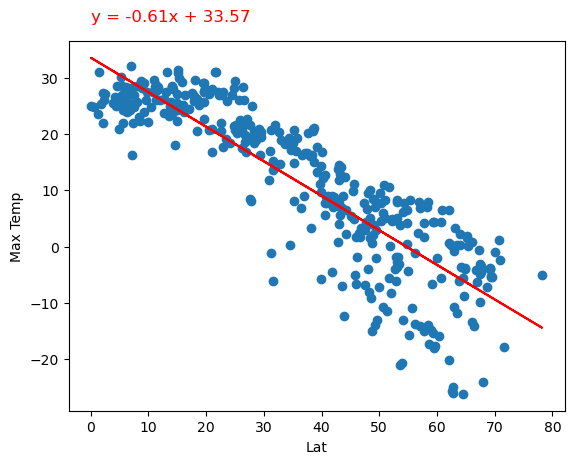

In [17]:
# Linear regression on Northern Hemisphere
# Linear regression on Northern Hemisphere
regression_plot(northern_hem_df, "Lat", "Max Temp", line_eq_pos={'x': 0, 'y': 40})

the r-value: 0.6712345922686607


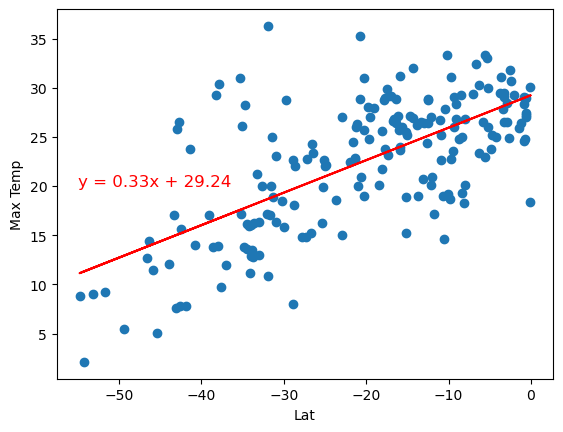

In [18]:
# Linear regression on Southern Hemisphere
regression_plot(southern_hem_df,"Lat","Max Temp",line_eq_pos={'x': -55, 'y': 20})

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

the r-value: 0.2763775028719779


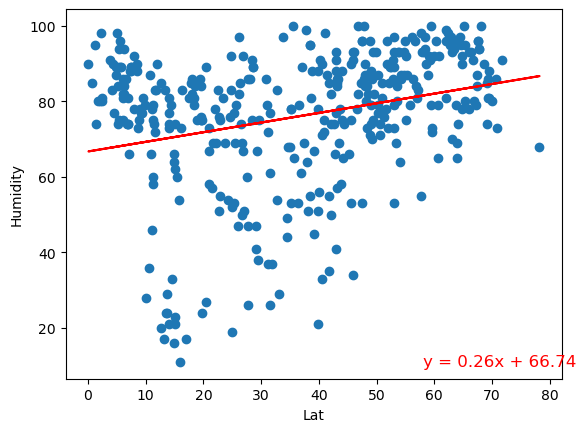

In [19]:
# Northern Hemisphere
regression_plot(northern_hem_df,"Lat","Humidity",line_eq_pos={'x': 58, 'y': 10})

the r-value: 0.17063384790853278


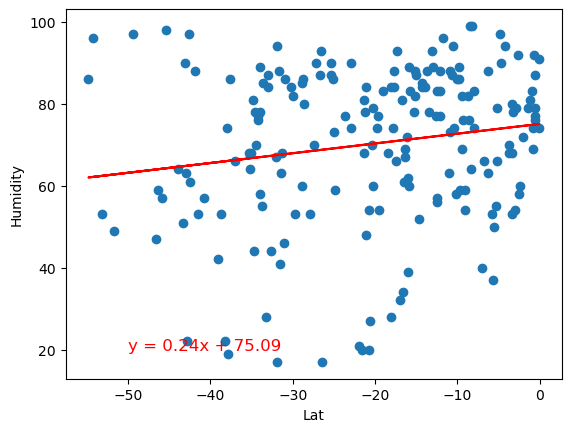

In [20]:
# Southern Hemisphere
regression_plot(southern_hem_df,"Lat","Humidity",line_eq_pos={'x': -50, 'y': 20})

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

the r-value: 0.11231335052051261


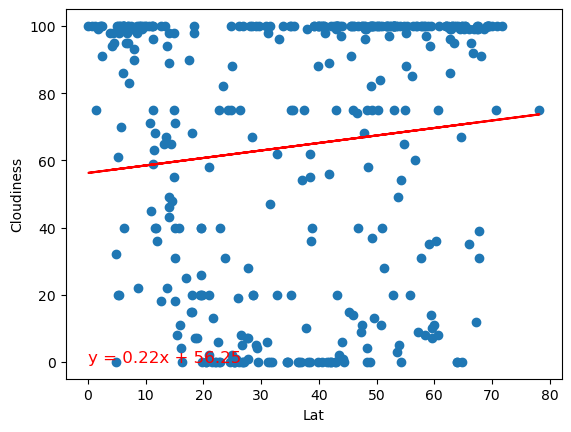

In [21]:
# Northern Hemisphere
regression_plot(northern_hem_df,"Lat","Cloudiness", line_eq_pos={'x': 0, 'y': 0})

the r-value: 0.2666688218531656


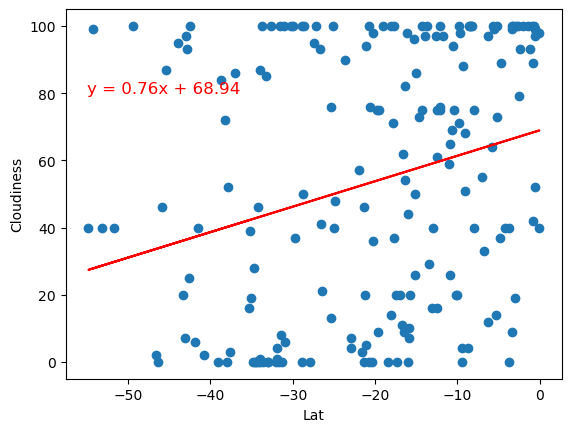

In [23]:
# Southern Hemisphere
regression_plot(southern_hem_df,"Lat","Cloudiness", line_eq_pos={'x': -55, 'y': 80})

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

the r-value: 0.1821247790314252


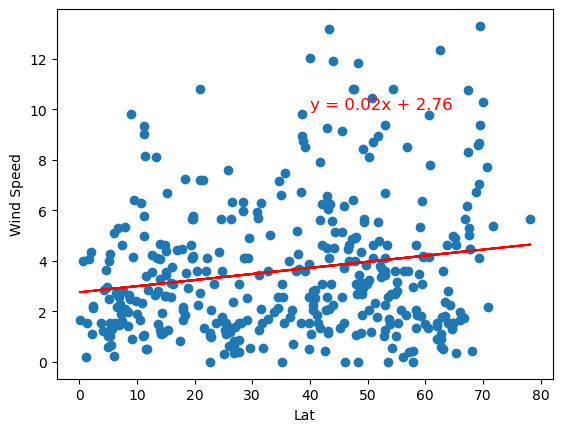

In [24]:
# Northern Hemisphere
regression_plot(northern_hem_df,"Lat","Wind Speed",line_eq_pos={'x': 40, 'y': 10})

the r-value: 0.07097464386986613


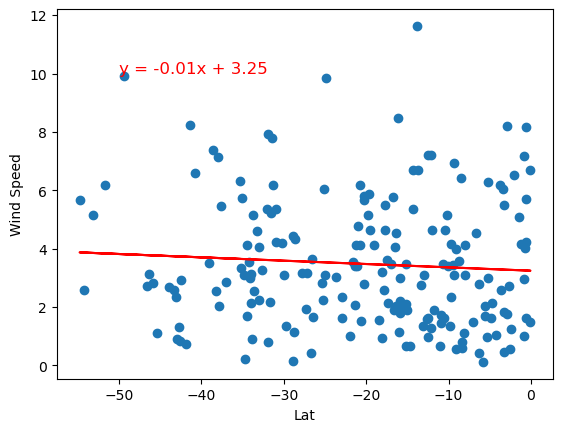

In [25]:
# Southern Hemisphere
regression_plot(southern_hem_df,"Lat","Wind Speed",line_eq_pos={'x': -50, 'y': 10})

**Discussion about the linear relationship:** YOUR RESPONSE HERE